In [3]:
import os
import numpy as np
import pandas as pd
import nibabel as nb
import matplotlib.pyplot as plt

In [4]:
#2 is all-tumor = (2+4+1)
#4 is tumor core = (2+1)
#1 is necrotic

In [5]:
#Data folders
hgg_patients = ["data/orig/HGG/" + x + "/"for x in os.listdir("data/orig/HGG")]
lgg_patients = ["data/orig/LGG/" + x + "/" for x in os.listdir("data/orig/LGG")]

In [16]:
random_folder = hgg_patients[np.random.randint(len(hgg_patients))]
files = [random_folder + x for x in os.listdir(random_folder)]
    
#Sort so that you always know the order of files coming in
files.sort()
imgs = np.array([nb.load(x).get_data() for x in files])
imgs = np.pad(imgs, ((0,0), (8, 8), (8, 8), (0, 0)), 'reflect')

flair = imgs[0,:,:,:]
t1 = imgs[2,:,:,:]
t1ce = imgs[3,:,:,:]
t2 = imgs[4,:,:,:]
seg = imgs[1,:,:,:]

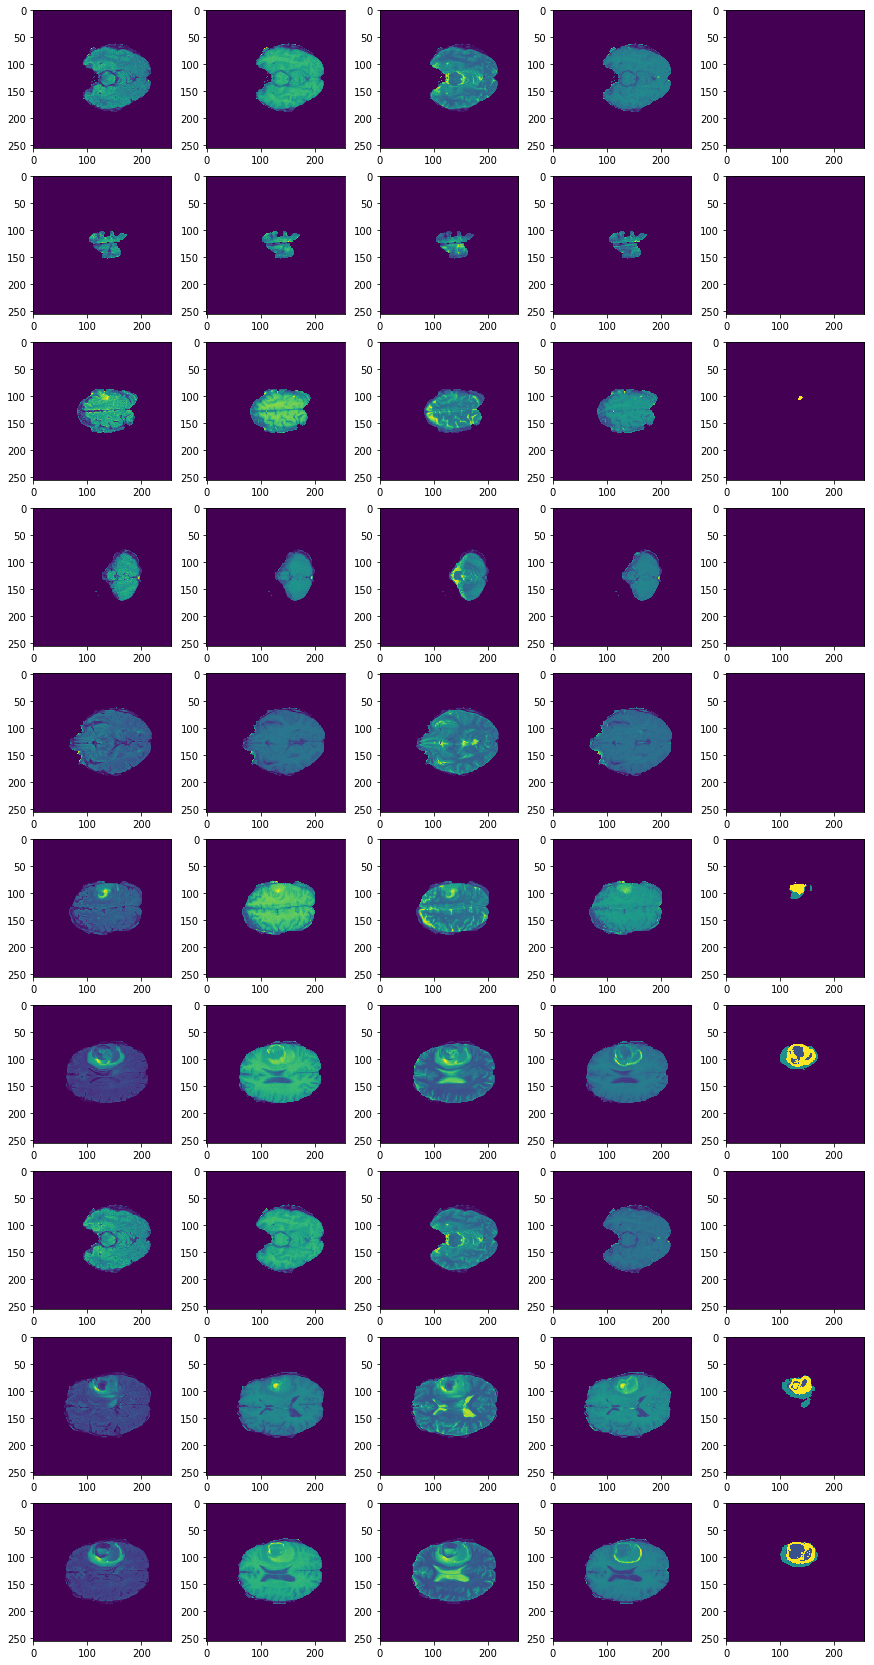

In [17]:
fig, axs = plt.subplots(10, 5, figsize=(15, 30))
axs = axs.ravel()

for i in range(10):
    pxl_sum = 0
    while pxl_sum == 0:
        random_index = np.random.randint(155)
        pxl_sum = np.sum(flair[:, :, random_index])
    axs[i*5 + 0].imshow(flair[:,:,random_index])
    axs[i*5 + 1].imshow(t1[:,:,random_index])
    axs[i*5 + 2].imshow(t2[:,:,random_index])
    axs[i*5 + 3].imshow(t1ce[:,:,random_index])
    axs[i*5 + 4].imshow(seg[:,:,random_index])